<a href="https://colab.research.google.com/github/rajcreo/jobathon-march-2022/blob/main/Job_A_Thon_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Importing relevant libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from collections import Counter

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from scipy import stats

# Step 2: Importing Dataset

In [ ]:
# mounting the google drive for importing required dataset
from google.colab import drive
drive.mount('/content/drive',)

Mounted at /content/drive


In [ ]:
# train and test path setup
train_path = "/content/drive/MyDrive/Job-A-Thon_2022/Dataset/train.csv"
test_path = "/content/drive/MyDrive/Job-A-Thon_2022/Dataset/test.csv"

In [ ]:
# importing train and test set
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [ ]:
# number of records in train and test set
print(f"train: {train_df.shape}")
print(f"test: {test_df.shape}")

train: (39161, 19)
test: (13184, 18)


# Step 3: Preprocessing

In [ ]:
# dropping id, created_at, signup_date and buy from train set and test set
train = train_df.drop(['id', 'created_at', 'signup_date'], axis=1)
test = test_df. drop(['id', 'created_at', 'signup_date'], axis=1)

In [ ]:
# replacing nan with zero
train['products_purchased'] = train['products_purchased'].fillna(0)
test['products_purchased'] = test['products_purchased'].fillna(0)

In [ ]:
X = train.drop(['buy'], axis=1)
y = train['buy']

In [ ]:
train.isnull().sum()

campaign_var_1          0
campaign_var_2          0
products_purchased      0
user_activity_var_1     0
user_activity_var_2     0
user_activity_var_3     0
user_activity_var_4     0
user_activity_var_5     0
user_activity_var_6     0
user_activity_var_7     0
user_activity_var_8     0
user_activity_var_9     0
user_activity_var_10    0
user_activity_var_11    0
user_activity_var_12    0
buy                     0
dtype: int64

In [ ]:
test.isnull().sum()

campaign_var_1          0
campaign_var_2          0
products_purchased      0
user_activity_var_1     0
user_activity_var_2     0
user_activity_var_3     0
user_activity_var_4     0
user_activity_var_5     0
user_activity_var_6     0
user_activity_var_7     0
user_activity_var_8     0
user_activity_var_9     0
user_activity_var_10    0
user_activity_var_11    0
user_activity_var_12    0
dtype: int64

In [ ]:
train.columns

Index(['campaign_var_1', 'campaign_var_2', 'products_purchased',
       'user_activity_var_1', 'user_activity_var_2', 'user_activity_var_3',
       'user_activity_var_4', 'user_activity_var_5', 'user_activity_var_6',
       'user_activity_var_7', 'user_activity_var_8', 'user_activity_var_9',
       'user_activity_var_10', 'user_activity_var_11', 'user_activity_var_12',
       'buy'],
      dtype='object')

# Step 4: Exploratory Data Analysis (EDA)

In [ ]:
# function to count number of each label in a column
def count_labels(df, column):
  unique_arr = df[column].unique()
  for item in unique_arr:
    print(f"No. of {item}: {df[column].value_counts()[item]}")

In [ ]:
# function countplot to show the frequency of column
def count_plot(df, column):
  plt.figure(figsize=(8,5))
  sns.countplot(column, data=df,palette='summer')

In [ ]:
# function for printing the unique frequency in each column of dataset
def print_unique(df):
  columns = df.columns
  for column in columns:
    print(f"==================== {column} ===================")
    count_labels(df, column)
    print()

In [ ]:
# function for ploting the unique frequency in each column of dataset
def plot_unique(df):
  columns = df.columns
  for column in columns:
    count_plot(df, column)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

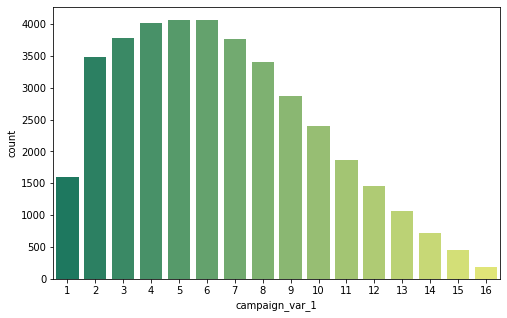

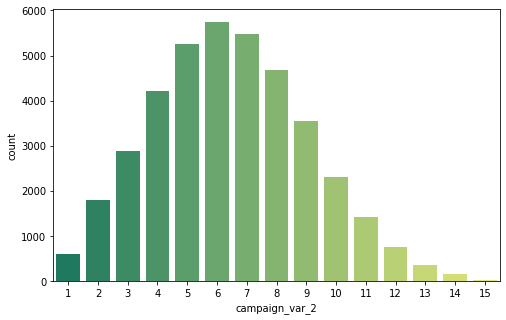

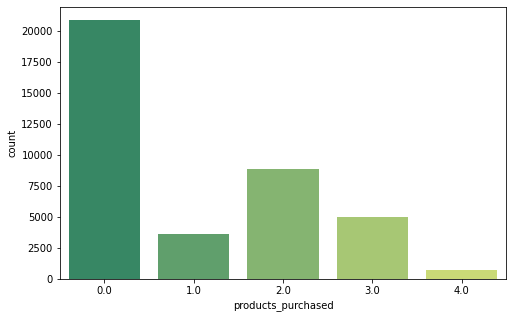

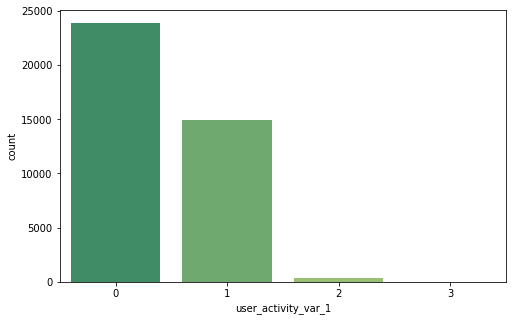

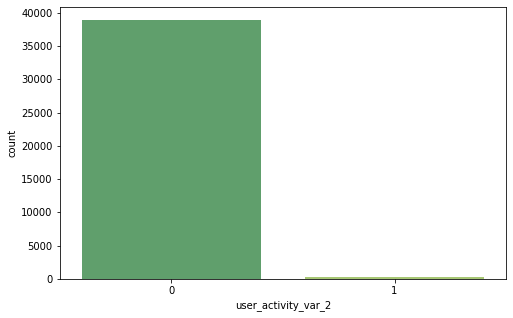

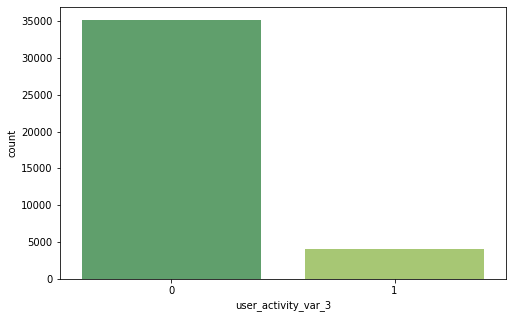

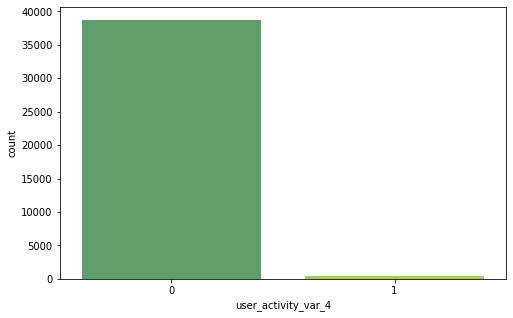

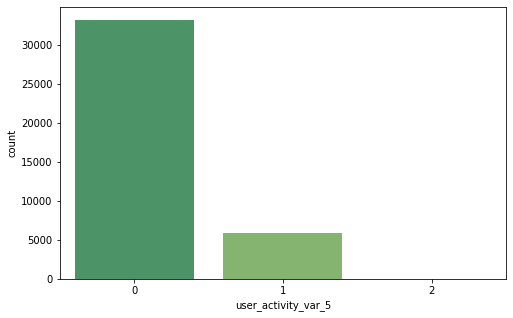

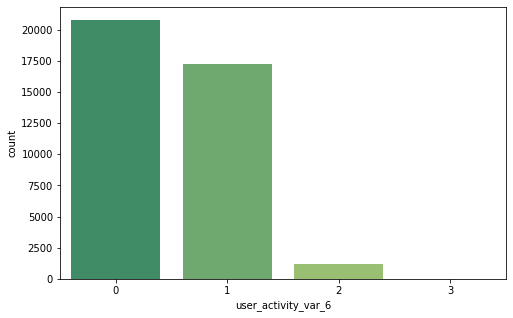

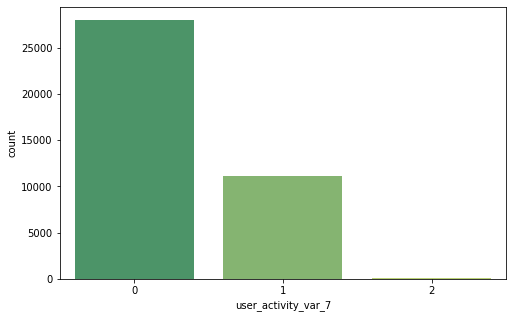

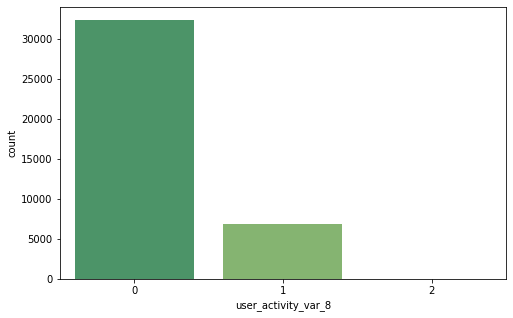

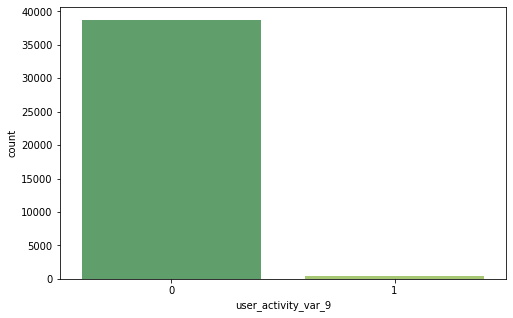

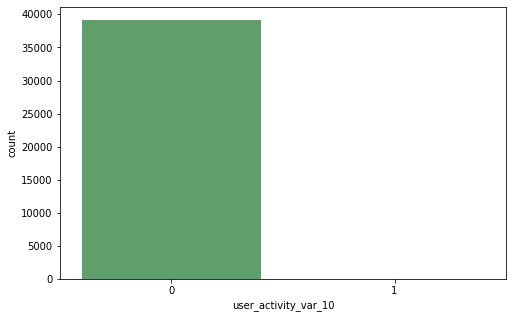

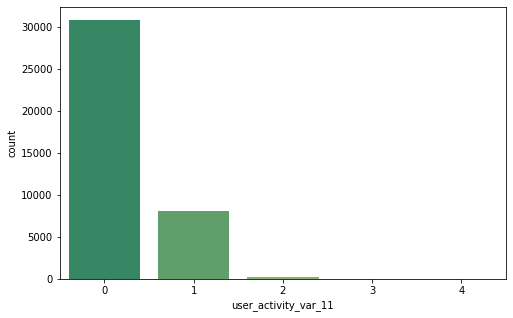

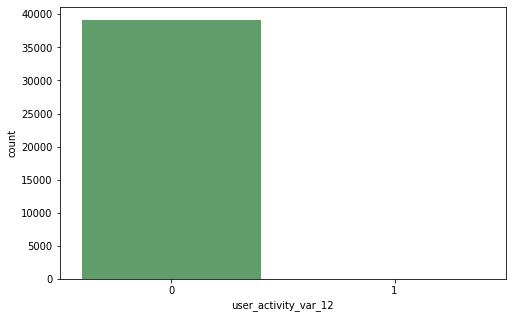

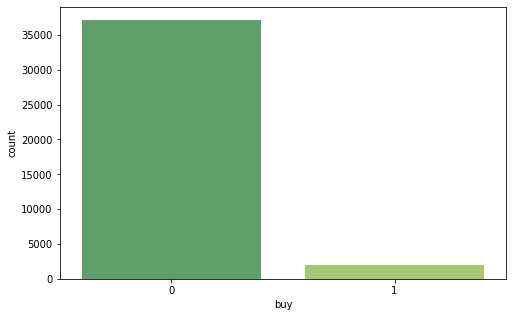

In [ ]:
plot_unique(train)

In [ ]:
print_unique(train)

==================== campaign_var_1 ===================
No. of 1: 1593
No. of 2: 3486
No. of 9: 2866
No. of 6: 4061
No. of 4: 4018
No. of 3: 3784
No. of 5: 4060
No. of 7: 3756
No. of 13: 1059
No. of 8: 3407
No. of 12: 1455
No. of 10: 2392
No. of 14: 714
No. of 11: 1873
No. of 16: 181
No. of 15: 456

==================== campaign_var_2 ===================
No. of 2: 1788
No. of 1: 589
No. of 3: 2883
No. of 7: 5472
No. of 6: 5744
No. of 4: 4213
No. of 10: 2298
No. of 5: 5250
No. of 8: 4690
No. of 9: 3537
No. of 12: 761
No. of 11: 1410
No. of 13: 351
No. of 14: 151
No. of 15: 24

==================== products_purchased ===================
No. of 2.0: 8867
No. of 3.0: 5024
No. of 0.0: 20911
No. of 1.0: 3643
No. of 4.0: 716

==================== user_activity_var_1 ===================
No. of 0: 23869
No. of 1: 14917
No. of 2: 374
No. of 3: 1

==================== user_activity_var_2 ===================
No. of 0: 38898
No. of 1: 263

==================== user_activity_var_3 ==================

In [ ]:
print_unique(test)

==================== campaign_var_1 ===================
No. of 2: 665
No. of 4: 1068
No. of 8: 1307
No. of 9: 1160
No. of 13: 568
No. of 1: 227
No. of 6: 1259
No. of 3: 860
No. of 14: 440
No. of 5: 1179
No. of 10: 1027
No. of 7: 1304
No. of 15: 340
No. of 11: 921
No. of 12: 708
No. of 16: 151

==================== campaign_var_2 ===================
No. of 2: 185
No. of 7: 1775
No. of 8: 1923
No. of 5: 1110
No. of 4: 783
No. of 12: 698
No. of 6: 1477
No. of 3: 410
No. of 11: 1013
No. of 10: 1481
No. of 9: 1682
No. of 13: 379
No. of 1: 33
No. of 14: 179
No. of 15: 56

==================== products_purchased ===================
No. of 0.0: 8136
No. of 3.0: 1260
No. of 2.0: 2484
No. of 1.0: 1106
No. of 4.0: 198

==================== user_activity_var_1 ===================
No. of 1: 4857
No. of 0: 8207
No. of 2: 119
No. of 3: 1

==================== user_activity_var_2 ===================
No. of 1: 56
No. of 0: 13128

==================== user_activity_var_3 ===================
No. of 0: 11

# Normalization

In [ ]:
X_col = X.columns
X_col

Index(['campaign_var_1', 'campaign_var_2', 'products_purchased',
       'user_activity_var_1', 'user_activity_var_2', 'user_activity_var_3',
       'user_activity_var_4', 'user_activity_var_5', 'user_activity_var_6',
       'user_activity_var_7', 'user_activity_var_8', 'user_activity_var_9',
       'user_activity_var_10', 'user_activity_var_11', 'user_activity_var_12'],
      dtype='object')

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_np = scaler.fit_transform(X)

In [ ]:
X_scaled = pd.DataFrame(X_np, columns=X_col)

In [ ]:
X_scaled.head()

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
0,0.000000,0.071429,0.50,0.000000,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0,0.0,0.00,0.0
1,0.066667,0.000000,0.50,0.333333,0.0,1.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.00,0.0
2,0.533333,0.142857,0.75,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
3,0.333333,0.428571,0.50,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
4,0.200000,0.357143,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.25,0.0


In [ ]:
test_col = test.columns

scaler = MinMaxScaler()
test_np = scaler.fit_transform(test)
test_scaled = pd.DataFrame(test_np, columns=test_col)
test_scaled.head()

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
0,0.066667,0.071429,0.00,0.333333,1.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.333333,0.0
1,0.200000,0.428571,0.75,0.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.5,0.0,0.0,0.000000,0.0
2,0.466667,0.428571,0.00,0.000000,0.0,0.0,0.0,0.5,0.333333,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.533333,0.500000,0.50,0.000000,0.0,0.0,0.0,0.5,0.333333,0.5,0.0,0.0,0.0,0.666667,0.0
4,0.200000,0.285714,0.50,0.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0


# Model building

## XGBoost

In [ ]:
# XGboot calssification Model
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)

In [ ]:
xgb.fit(X_scaled, y) #.83806

XGBClassifier(learning_rate=0.05, n_estimators=1000)

In [ ]:
# define evaluation procedure
model = XGBClassifier(n_estimators=1000, learning_rate=0.05)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_scaled, y, scoring='f1_macro', cv=cv, n_jobs=-1)
# summarize performance
print('Mean F1-Score: %.5f' % np.mean(scores))

Mean F1-Score: 0.83722


In [ ]:
model = XGBClassifier(scale_pos_weight=100)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_scaled, y, scoring='f1_macro', cv=cv, n_jobs=-1)
# summarize performance
print('Mean F1-Score: %.5f' % np.mean(scores))

Mean F1-Score: 0.83254


# Step 7: Prediction on Test set and Submission

In [ ]:
submission_path = '/content/drive/MyDrive/Job-A-Thon_2022/sample_submission.csv'

In [ ]:
submission = pd.read_csv(submission_path)
final_predictions = dt.predict(test_scaled)
submission['buy'] = final_predictions
#only positive predictions for the target variable
# submission['buy'] = submission['buy'].apply(lambda x: 0 if x<0 else x)
submission.to_csv('my_submission_dt.csv', index=False)

In [ ]:
# solution
# learning rate/eta - 0.1
# max depth - 10
# n_estimators - 5000
# my_submission_xgb_full_n5000_lr1_max10.csv

# Rough

In [ ]:
temp_X = train.drop(['products_purchased',
       'user_activity_var_1', 'user_activity_var_2', 'user_activity_var_3',
       'user_activity_var_4', 'user_activity_var_5', 'user_activity_var_6',
       'user_activity_var_7', 'user_activity_var_8', 'user_activity_var_9',
       'user_activity_var_10', 'user_activity_var_11', 'user_activity_var_12', 
       'buy'], axis=1)

In [ ]:
temp_test = test.drop(['products_purchased',
       'user_activity_var_1', 'user_activity_var_2', 'user_activity_var_3',
       'user_activity_var_4', 'user_activity_var_5', 'user_activity_var_6',
       'user_activity_var_7', 'user_activity_var_8', 'user_activity_var_9',
       'user_activity_var_10', 'user_activity_var_11', 'user_activity_var_12'], axis=1)

In [ ]:
temp_y = train['buy']

In [ ]:
# min max normalization
temp_X_col = temp_X.columns
scaler = MinMaxScaler()
temp_X_np = scaler.fit_transform(temp_X)
temp_X_scaled = pd.DataFrame(temp_X_np, columns=temp_X_col)

In [ ]:
temp_X_scaled.head()

,campaign_var_1,campaign_var_2
0,0.000000,0.071429
1,0.066667,0.000000
2,0.533333,0.142857
3,0.333333,0.428571
4,0.200000,0.357143
